In [1]:
import pandas as pd
import numpy as np

# Load Excel file into a pandas DataFrame
df = pd.read_csv('test2.csv')
x = df.loc[:,"Actual"]
y = df.loc[:,"Classification"]


In [2]:
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
cm = confusion_matrix(x, y)
print(cm)
print('classification report')

report = classification_report(x, y, target_names=['covid', 'normal', 'pneumonia'], digits=4)
print(report )

def report_to_df(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df
report = report_to_df(report)

report.to_csv('classification report.csv', index=True)

[[269   6 188]
 [ 68 120 275]
 [ 26  12 425]]
classification report
              precision    recall  f1-score   support

       covid     0.7410    0.5810    0.6513       463
      normal     0.8696    0.2592    0.3993       463
   pneumonia     0.4786    0.9179    0.6292       463

    accuracy                         0.5860      1389
   macro avg     0.6964    0.5860    0.5599      1389
weighted avg     0.6964    0.5860    0.5599      1389



Confusion matrix, without normalization


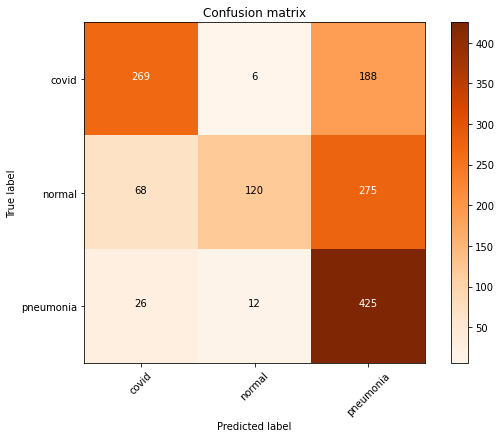

In [4]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.colorbar()

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.rcParams['font.size'] = '12'
    
    
plot_confusion_matrix(cm, classes=['covid', 'normal', 'pneumonia'],normalize=False,title='Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix' + '.jpg', dpi=500, bbox_inches = 'tight')